# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**Important:** This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results.

This notebook provides an overview of Dandiset 001375, a pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity.
The Dandiset can be found at [https://dandiarchive.org/dandiset/001375](https://dandiarchive.org/dandiset/001375).

This notebook will cover the following:
- Loading the Dandiset using the DANDI API
- Exploring the assets in the Dandiset
- Loading and visualizing data from an NWB file

The following packages are required to run this notebook:
- pynwb
- h5py
- remfile
- matplotlib
- numpy

In [1]:
from dandi.dandiapi import DandiAPIClient
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

Found 3 assets in the dataset

First 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)


## Loading an NWB file and exploring its contents

In this section, we will load one of the NWB files in the Dandiset and explore its contents.
We will load the following file: `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`

The URL for this asset is: `https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/`

You can also explore this file on neurosift:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Print some basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: mouse running laps in virtual hallway
Identifier: MS13B
Session start time: 2024-07-25 19:00:00-07:00


The NWB file contains the following data:
- **acquisition**: Time series data
- **electrode_groups**: Information about the electrode groups
- **devices**: Information about the devices
- **intervals**: Trial start/stop times
- **electrodes**: Information about the electrodes
- **subject**: Subject information
- **trials**: Trial information
- **units**: Unit information

### Loading and visualizing time series data

In this section, we will load and visualize a small segment of the time series data from the NWB file.

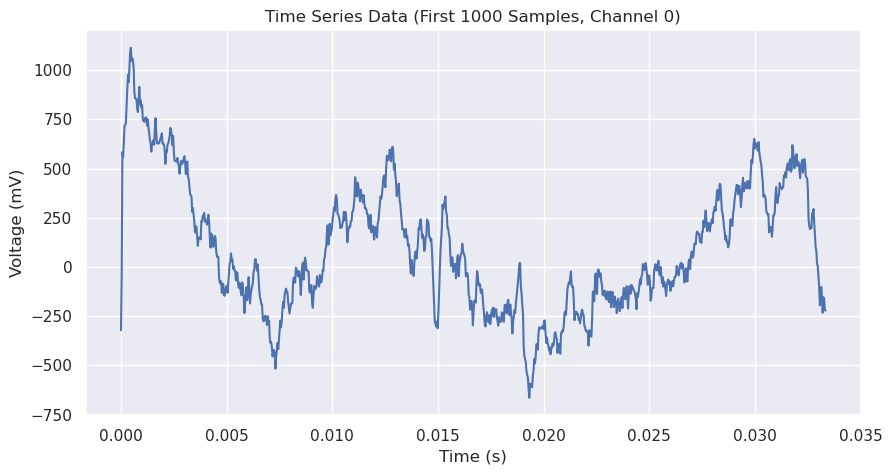

In [3]:
# Load a small segment of the time_series data (first 1000 samples from the first channel).
data = nwb.acquisition["time_series"].data[:1000, 0]
timestamps = np.linspace(0, len(data) / nwb.acquisition["time_series"].rate, len(data))

# Plot the data.
plt.figure(figsize=(10, 5))
plt.plot(timestamps, data)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.title("Time Series Data (First 1000 Samples, Channel 0)")
plt.show()

The plot shows the time series data for the first 1000 samples from the first channel.
The Y-axis (voltage) ranges from approximately -750 mV to 1000 mV.
The data starts with a large positive spike, then oscillates with decreasing amplitude.

### Plotting electrode locations

In this section, we will plot the electrode locations.

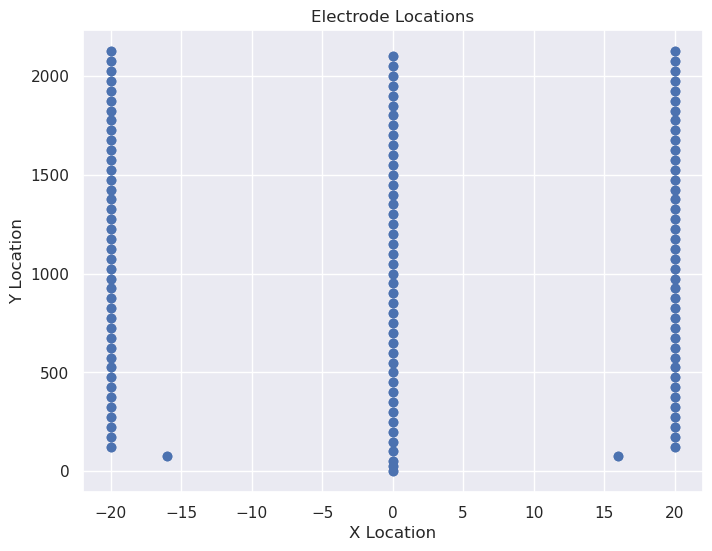

In [4]:
# Extract electrode locations
electrodes = nwb.electrodes.to_dataframe()
x = electrodes['x']
y = electrodes['y']

# Plot the electrode locations
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel("X Location")
plt.ylabel("Y Location")
plt.title("Electrode Locations")
plt.show()

The plot displays electrode locations with X coordinates ranging from approximately -20 to 20 and Y coordinates ranging from approximately 0 to 2200.
The majority of electrodes are distributed in three vertical lines at X locations near -20, 0, and 20.

## Findings and Future Directions

This notebook provided a basic overview of how to load and explore data from Dandiset 001375.
Some possible future directions for analysis include:
- Exploring the relationships between the time series data and the electrode locations
- Analyzing the spike times of the units in the NWB file
- Investigating the trial data